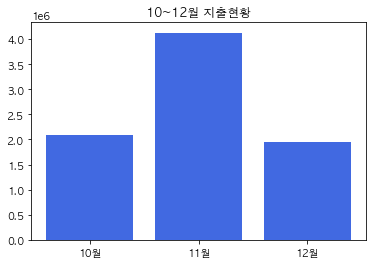

In [5]:
import matplotlib.pyplot as plt
import csv

f=open('card.csv','r',encoding='utf8')
data = csv.reader(f)
next(data)
data = list(data)


s_mon = [0,0,0]
for row in data:
    if row[-1] == '전표매입':
        mon, payment = int(row[0].split('-')[1]), int(row[-3])
        idx = mon - 10
        s_mon[idx] += payment
plt.rc('font',family='AppleGothic')
plt.title('10~12월 지출현황')
plt.bar(['10월','11월','12월'], s_mon, color='royalblue')
plt.show()

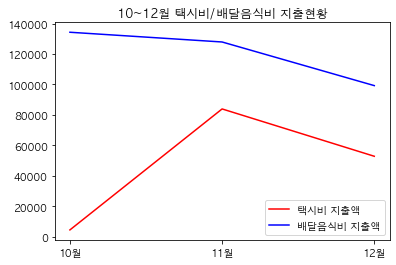

In [9]:
import matplotlib.pyplot as plt
import csv

f=open('card.csv','r',encoding='utf8')
data = csv.reader(f)
next(data)
data = list(data)

taxi = [0,0,0]
for row in data:
    if row[-1] == '전표매입' and '택시' in row[5]:
        mon, payment = int(row[0].split('-')[1]), int(row[-3])
        idx = mon - 10
        taxi[idx] += payment

deli = [0,0,0]
for row in data:
    if row[-1] == '전표매입' and row[5] == '(주)우아한형제들':
        mon, payment = int(row[0].split('-')[1]), int(row[-3])
        idx = mon - 10
        deli[idx] += payment

plt.rc('font',family='AppleGothic')
plt.title('10~12월 택시비/배달음식비 지출현황')
plt.plot(['10월','11월','12월'],taxi, label='택시비 지출액', color='r')
plt.plot(['10월','11월','12월'],deli, label='배달음식비 지출액',color='b')
plt.legend()
plt.show()
    

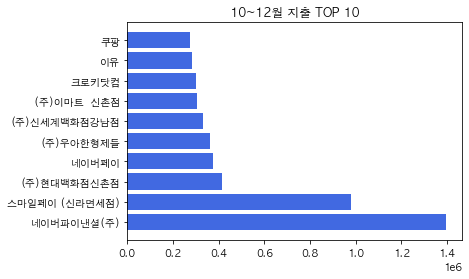

In [13]:
import matplotlib.pyplot as plt
import csv
import operator

f=open('card.csv','r',encoding='utf8')
data = csv.reader(f)
next(data)
data = list(data)

spending = {}
for row in data:
    if row[-1] == '전표매입':
        store, payment = row[-4], int(row[-3])
        if store not in spending.keys():
            spending[store] = payment
        else:
            spending[store] += payment
top10 = sorted(spending.items(), key=operator.itemgetter(1), reverse=True)[:10]
top10_store, top10_amount = [], []
for t in top10:
    top10_store.append(t[0])
    top10_amount.append(t[1])

plt.rc('font',family='AppleGothic')
plt.title('10~12월 지출 TOP 10')
plt.barh(top10_store, top10_amount, color='royalblue')
plt.show()